In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# IMPORT LIBRARIES

In [ ]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import nltk
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tqdm import tqdm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Creo il dataset

In [ ]:
neg1='/content/drive/MyDrive/Text Mining/negative/test'
neg2='/content/drive/MyDrive/Text Mining/negative/train'

In [ ]:
# Initialize empty lists to store data
reviews = []
labels = []

# Function to read files from a directory and append data to lists
def read_files(directory, label):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = file.read()
        reviews.append(content)
        labels.append(label)

# Read files from both directories
read_files(neg1, 'negative')
read_files(neg2, 'negative')

# Create a DataFrame from the lists
df = pd.DataFrame({'review': reviews, 'sentiment': labels})

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Text Mining/negative/negative_data.csv', index=False)

# Display the DataFrame
print(df.head())

                                              review sentiment
0  I, also having endured hundreds of children's ...  negative
1  This film is predictable; it is more predictab...  negative
2  What a sad sight these TV stalwarts make, runn...  negative
3  I'm a big fan of 50s sci-fi, but this is not o...  negative
4  "Feast of All Saints?" Where...? When...?<br /...  negative


In [ ]:
pos1='/content/drive/MyDrive/Text Mining/positive/test'
pos2='/content/drive/MyDrive/Text Mining/positive/train'

In [ ]:
# Initialize empty lists to store data
reviews = []
labels = []

# Function to read files from a directory and append data to lists
def read_files(directory, label):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = file.read()
        reviews.append(content)
        labels.append(label)

# Read files from both directories
read_files(pos1, 'positive')
read_files(pos2, 'positive')

# Create a DataFrame from the lists
df = pd.DataFrame({'review': reviews, 'sentiment': labels})

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Text Mining/negative/positive_data.csv', index=False)

# Display the DataFrame
print(df.head())

                                              review sentiment
0  I saw this movie on TV when it came out, and n...  positive
1  I agree with many of the negative reviews post...  positive
2  Since Douglas MacArthur affected more human li...  positive
3  I loved this movie. In fact I loved being an a...  positive
4  The only reason I give this movie 8/10 stars, ...  positive


In [ ]:

# Read the two CSV files into DataFrames
positive_df = pd.read_csv('/content/drive/MyDrive/Text Mining/negative/positive_data.csv')
negative_df = pd.read_csv('/content/drive/MyDrive/Text Mining/negative/negative_data.csv')

# Concatenate the DataFrames vertically
all_reviews_df = pd.concat([positive_df, negative_df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
all_reviews_df.to_csv('/content/drive/MyDrive/Text Mining/negative/IMDB_REVIEWS_ALL.csv', index=False)

# Display the concatenated DataFrame
print(all_reviews_df.head())

                                              review sentiment
0  I saw this movie on TV when it came out, and n...  positive
1  I agree with many of the negative reviews post...  positive
2  Since Douglas MacArthur affected more human li...  positive
3  I loved this movie. In fact I loved being an a...  positive
4  The only reason I give this movie 8/10 stars, ...  positive


In [ ]:
# Count the number of occurrences of each sentiment
all_reviews_df.to_csv('/content/drive/MyDrive/Text Mining/IMDB_REVIEWS_ALL.csv', index=False)
all_reviews_df.shape[0]

8669

In [ ]:
all_reviews_df['review'][0]

'I saw this movie on TV when it came out, and never seen it again. For the life of me, I couldn\'t remember the title and just stumbled across it while checking Roy Thinne\'s movie credits. Excellent, dark, and spooky TV horror movie in the same class as "Crowhaven Farm"; "Don\'t Be Afraid Of The Dark"; and "Satan\'s School for Girls", all lost Satanic classics. I also think it has many parallels to Clint Eastwood\'s classic, "High Plains Drifter". Why don\'t they release these great little movies, especially when you consider all of the more recent garbage that fills the discount DVD racks at Wal-Mart? Most of these flicks have a cult-following, so sales shouldn\'t be a problem.'

#PROCESSING

In [ ]:
pip install tweet-preprocessor

In [ ]:
import preprocessor as p
import string

# Caricare il file CSV
file_path = '/content/drive/MyDrive/Text Mining/IMDB_REVIEWS_ALL.csv'
df = pd.read_csv(file_path, delimiter=',')
new_IMDB_df = df

# converting reviews into lower case
def comment_lower(comment):
    return comment.lower()

# removing website links (parts starting with http) from reviews
def remove_links(comment):
    comment = re.sub("https?:\/\/\S+", "", comment)
    return comment

# removing breaks from reviews
def remove_breaks(comment):
    comment = re.sub("<br />", "", comment)
    return comment

# removing numbers
def remove_numbers(comment):
    comment = re.sub(r'\d+', '', str(comment))
    return comment

# removing punctuation from reviews
def remove_punctuation(comment):
    translator = str.maketrans('', '', string.punctuation)
    return comment.translate(translator)

# tokenization of reviews
def tokenize(comment):
    comment = word_tokenize(comment)
    return comment

# removing stopwords from reviews
stop_words = set(stopwords.words('english'))
def remove_stopwords(comment):
    comment = [i for i in comment if not i in stop_words]
    return comment

# lemmatization of reviews
lemmatizer = WordNetLemmatizer()
def lemmatize(comment):
    comment = [lemmatizer.lemmatize(token) for token in comment]
    return comment

def preprocessing(comment):
    comment = comment_lower(comment)
    comment = remove_links(comment)
    comment = remove_breaks(comment)
    comment = remove_numbers(comment)
    comment = remove_punctuation(comment)
    comment = tokenize(comment)
    comment = remove_stopwords(comment)
    comment = lemmatize(comment)
    comment = ' '.join(comment)
    return comment

clean_reviews = []
for comment in new_IMDB_df['review']:
    initial_pp_review = p.clean(str(comment))
    preprocessed_review = preprocessing(initial_pp_review)
    clean_reviews.append(preprocessed_review)

new_IMDB_df['clean_review'] = clean_reviews


# Salvare il file CSV modificato
output_file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
new_IMDB_df.to_csv(output_file_path, index=False)


#POPULAR TOKEN IDENTIFICATION

In [ ]:
file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
new_IMDB_df = pd.read_csv(file_path, delimiter=',')
tokens = []
for comment in new_IMDB_df["clean_review"]:
    for token in word_tokenize(comment):
        tokens.append(token)

['movie', 'get', 'respect', 'sure', 'lot', 'memorable', 'quote', 'listed', 'gem', 'imagine', 'movie', 'joe', 'piscopo', 'actually', 'funny', 'maureen', 'stapleton', 'scene', 'stealer', 'moroni']


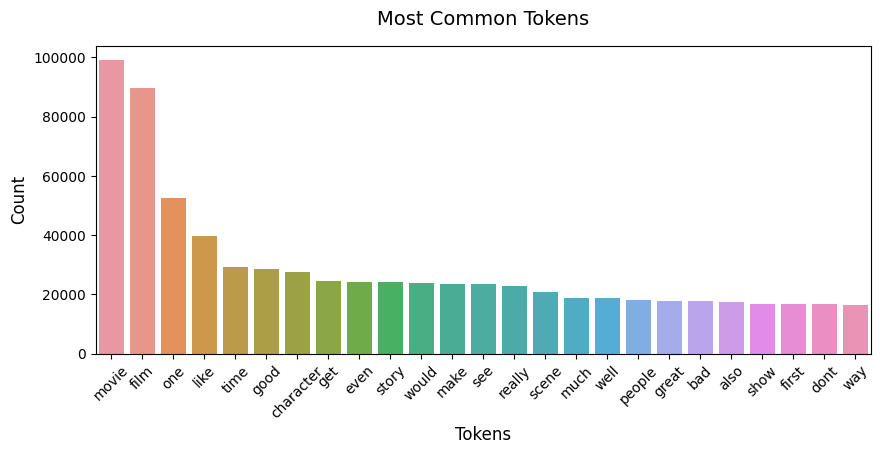

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist


print(tokens[:20])

FreqDist(tokens).most_common()[:25]
fdist = FreqDist(tokens).most_common()[:25]
fdist_dict = dict(fdist)
fdist_dict_sorted = sorted(fdist_dict.items(), key=lambda kv: kv[1], reverse=True)
token, token_counts = list(zip(*fdist_dict_sorted))
token_str = list(map(lambda x: ''.join(x), token))
token_arr = np.array(token_str)
token_counts_arr = np.array(token_counts)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x=token_arr, y=token_counts_arr)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title("Most Common Tokens", fontsize=14, pad=15)
ax.set_xlabel("Tokens", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

<ipython-input-18-ea7469876769>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pos_IMDB_df['clean_review'] = Pos_IMDB_df['clean_review'].apply(lambda review: ' '.join([word for word in review.split() if word.lower() not in exclude_tokens]))


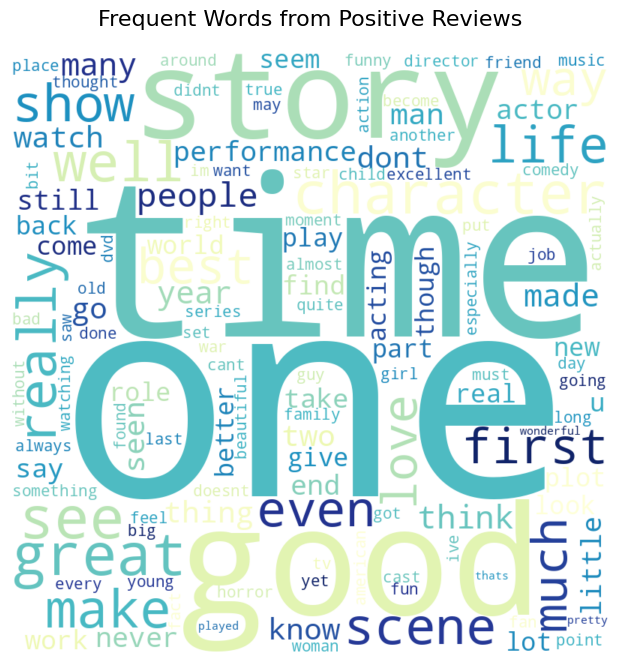

In [ ]:
Pos_IMDB_df = new_IMDB_df[new_IMDB_df['sentiment'] == 'positive']


exclude_tokens = ['movie', 'film']
Pos_IMDB_df['clean_review'] = Pos_IMDB_df['clean_review'].apply(lambda review: ' '.join([word for word in review.split() if word.lower() not in exclude_tokens]))

pos_words = ' '.join(str(review) for review in Pos_IMDB_df['clean_review'])
wordcloud = WordCloud(width=800, height=800,
                      colormap='YlGnBu',
                      background_color='white',
                      min_font_size=12,
                      max_words=150,
                      stopwords=STOPWORDS,
                      collocations=False).generate(pos_words)

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Frequent Words from Positive Reviews", fontsize=16, pad=20)
plt.show()

<ipython-input-20-6e71694a241b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Neg_IMDB_df['clean_review'] = Neg_IMDB_df['clean_review'].apply(lambda review: ' '.join([word for word in review.split() if word.lower() not in exclude_tokens]))


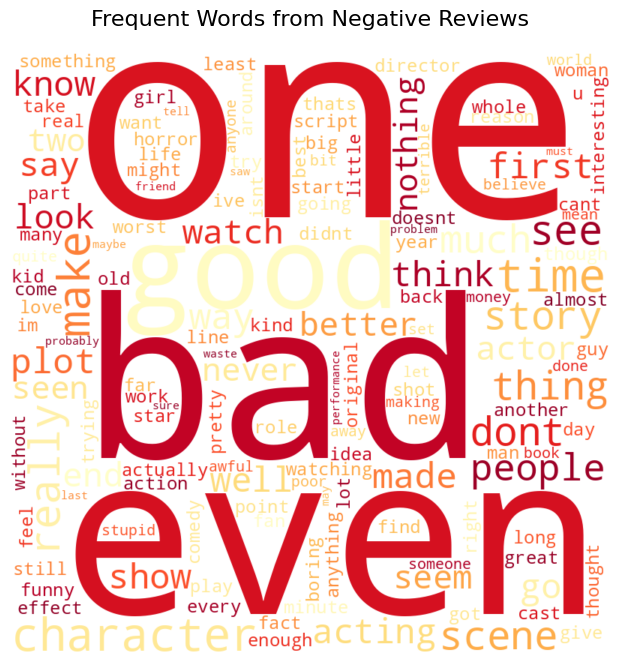

In [ ]:
Neg_IMDB_df = new_IMDB_df[new_IMDB_df['sentiment'] == 'negative']

# Exclude specific tokens like 'movie' and 'film'
exclude_tokens = ['movie', 'film']
Neg_IMDB_df['clean_review'] = Neg_IMDB_df['clean_review'].apply(lambda review: ' '.join([word for word in review.split() if word.lower() not in exclude_tokens]))

neg_words = ' '.join(str(review) for review in Neg_IMDB_df['clean_review'])
wordcloud = WordCloud(width=800, height=800,
                      colormap='YlOrRd',
                      background_color='white',
                      min_font_size=12,
                      max_words=150,
                      stopwords=STOPWORDS,
                      collocations=False).generate(neg_words)

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Frequent Words from Negative Reviews", fontsize=16, pad=20)
plt.show()


# MOST POPULAR ADJECTIVES


In [ ]:
file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
df = pd.read_csv(file_path, delimiter=',')
df = pd.DataFrame(df)

In [ ]:
file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
df = pd.read_csv(file_path, delimiter=',')
df = pd.DataFrame(df)

def extract_adjectives(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word.lower() for word, tag in tagged_tokens if tag.startswith('JJ') and word.lower() not in stopwords.words('english')]
    return adjectives

# Apply the function to the 'clean_review' column
df['adjectives'] = df['clean_review'].apply(extract_adjectives)
all_adjectives = [adj for adjectives_list in df['adjectives'] for adj in adjectives_list]
most_common_adjectives = Counter(all_adjectives).most_common()
result_df = pd.DataFrame(most_common_adjectives, columns=['Adjective', 'Frequency'])

print(result_df)

In [ ]:
indices_to_exclude = [1, 9]
result_df = result_df.drop(indices_to_exclude)
result_df = result_df.reset_index(drop=True)

colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = result_df['Frequency'].head(10), y=result_df['Adjective'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=result_df['Adjective'].head(10),values=result_df['Frequency'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="<i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = result_df['Frequency'].head(10).to_list()
y = result_df['Adjective'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show()

most popular adjectives for positive reviews

In [ ]:
file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
df = pd.read_csv(file_path, delimiter=',')
df = pd.DataFrame(df)

df = df[df['sentiment'] == 'positive']

def extract_adjectives(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word.lower() for word, tag in tagged_tokens if tag.startswith('JJ') and word.lower() not in stopwords.words('english')]
    return adjectives

# Apply the function to the 'clean_review' column
df['adjectives'] = df['clean_review'].apply(extract_adjectives)
all_adjectives = [adj for adjectives_list in df['adjectives'] for adj in adjectives_list]
most_common_adjectives = Counter(all_adjectives).most_common()
result_df = pd.DataFrame(most_common_adjectives, columns=['Adjective', 'Frequency'])

In [ ]:
positive_df=result_df
positive_df[:10]

,Adjective,Frequency
0,good,2033
1,great,1925
2,many,1062
3,best,1035
4,much,904
5,little,845
6,real,702
7,new,693
8,first,676
9,young,595


In [ ]:
result_df=positive_df[:10]
result_df = result_df.reset_index(drop=True)

colors = ['rgb(15,127,28)', 'rgb(38,139,50)', 'rgb(62,152,73)', 'rgb(62,152,73)',
          'rgb(87,165,96)', 'rgb(111,178,118)', 'rgb(135,191,141)',
          'rgb(159,203,164)', 'rgb(183,216,186)', 'rgb(207,229,209)']



# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = result_df['Frequency'].head(10), y=result_df['Adjective'].head(10),marker=dict(color='rgba(62,152,73, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=result_df['Adjective'].head(10),values=result_df['Frequency'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="<i>(10 Most Common Adjectives)</i>",
                  font=dict(size=18, color='rgb(62,152,73)')))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Adjectives', font_size=14, font_color='rgb(159,203,164)'),
                             tickfont=dict(color='rgb(159,203,164)')),

                  xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Adjective Count', font_size=14, font_color='rgb(159,203,164)'),
                             tickfont=dict(color='rgb(159,203,164)')),
                  margin=dict(l=100, r=20, t=70, b=70),
                  paper_bgcolor='white',
                  plot_bgcolor='white')

# Specify X and Y values for Annotations
x = result_df['Frequency'].head(10).to_list()
y = result_df['Adjective'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False, font=dict(color='rgb(159,203,164)')) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show()

most popular adjectives for negative reviews

In [ ]:
file_path = '/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv'
df = pd.read_csv(file_path, delimiter=',')
df = pd.DataFrame(df)
df = df[df['sentiment'] == 'negative']

def extract_adjectives(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word.lower() for word, tag in tagged_tokens if tag.startswith('JJ') and word.lower() not in stopwords.words('english')]
    return adjectives

# Apply the function to the 'clean_review' column
df['adjectives'] = df['clean_review'].apply(extract_adjectives)
all_adjectives = [adj for adjectives_list in df['adjectives'] for adj in adjectives_list]
most_common_adjectives = Counter(all_adjectives).most_common()
result_df = pd.DataFrame(most_common_adjectives, columns=['Adjective', 'Frequency'])

In [ ]:
negative_df=result_df
negative_df[:10]

,Adjective,Frequency
0,bad,2929
1,good,2810
2,much,1413
3,many,1138
4,little,1133
5,great,1003
6,old,854
7,real,821
8,first,809
9,worst,775


In [ ]:
result_df=negative_df[:10]
result_df = result_df.reset_index(drop=True)

colors = ['rgb(213,45,45)', 'rgb(217,66,66)', 'rgb(221,86,86)', 'rgb(225,108,108)',
'rgb(229,129,129)', 'rgb(234,150,150)', 'rgb(238,171,171)',
'rgb(242,192,192)', 'rgb(246,213,213)', 'rgb(250,234,234)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = result_df['Frequency'].head(10), y=result_df['Adjective'].head(10),marker=dict(color='rgba(217,66,66, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=result_df['Adjective'].head(10),values=result_df['Frequency'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="<i>(10 Most Common Adjectives)</i>",
                  font=dict(size=18, color='rgb(217,66,66)')))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Adjectives', font_size=14, font_color='rgb(242,192,192)'),
                             tickfont=dict(color='rgb(242,192,192)')),

                  xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Adjective Count', font_size=14, font_color='rgb(242,192,192)'),
                             tickfont=dict(color='rgb(242,192,192)')),
                  margin=dict(l=100, r=20, t=70, b=70),
                  paper_bgcolor='white',
                  plot_bgcolor='white')

# Specify X and Y values for Annotations
x = result_df['Frequency'].head(10).to_list()
y = result_df['Adjective'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False, font=dict(color='rgb(242,192,192)')) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show()

#N_GRAM_ANALYSIS

In [ ]:
# Carica il file CSV
new_IMDB_df = pd.read_csv('/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv', delimiter = ',')

comment_list = []
for comment in new_IMDB_df["clean_review"]:
    tokens = []
    for token in word_tokenize(comment):
        tokens.append(token)
    comment_list.append(tokens)


bigrams_list = []
for comment_tokens in comment_list:
    bigrams_list.extend(list(bigrams(comment_tokens)))

bigrams_freq = Counter(bigrams_list)
bigrams_freq.most_common(25)


[(('look', 'like'), 2879),
 (('ever', 'seen'), 2532),
 (('special', 'effect'), 2200),
 (('ive', 'seen'), 2148),
 (('dont', 'know'), 2054),
 (('main', 'character'), 1878),
 (('even', 'though'), 1867),
 (('one', 'best'), 1843),
 (('year', 'old'), 1736),
 (('movie', 'like'), 1714),
 (('movie', 'ever'), 1546),
 (('see', 'movie'), 1495),
 (('horror', 'movie'), 1493),
 (('good', 'movie'), 1461),
 (('waste', 'time'), 1441),
 (('much', 'better'), 1426),
 (('horror', 'film'), 1374),
 (('watch', 'movie'), 1363),
 (('first', 'time'), 1327),
 (('im', 'sure'), 1324),
 (('bad', 'movie'), 1319),
 (('ive', 'ever'), 1301),
 (('make', 'movie'), 1280),
 (('new', 'york'), 1279),
 (('film', 'like'), 1250)]

Bigram Network

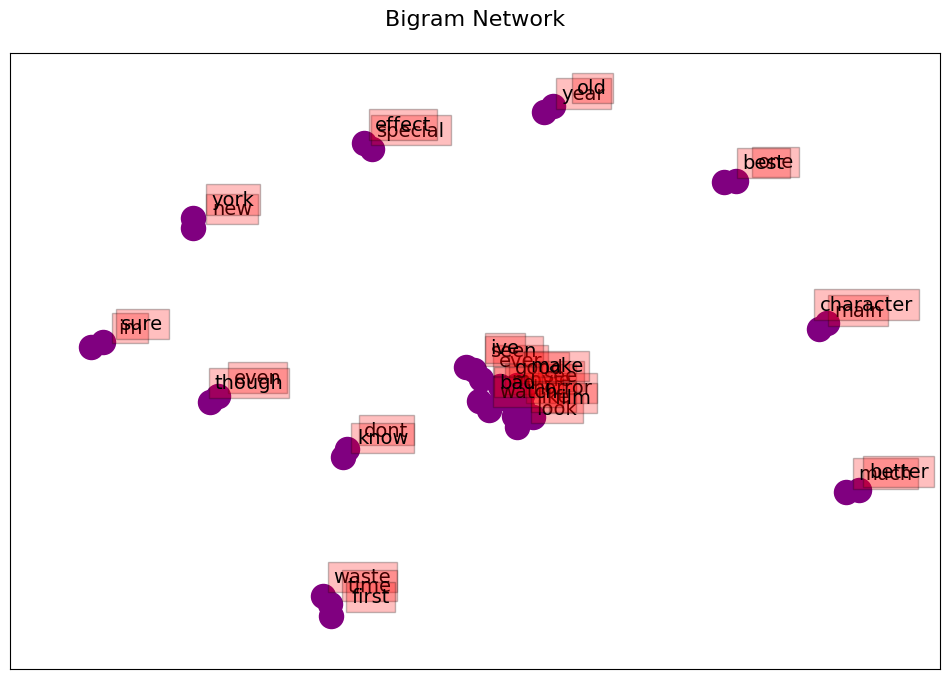

In [ ]:
G = nx.Graph()
for b, freq in bigrams_freq.most_common(25):
    G.add_edge(b[0], b[1], weight=freq)

plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color="grey",
                 node_color="purple",
                 with_labels=False)

# create offset labels
for key, value in pos.items():
    x, y = value[0] + 0.1, value[1] + 0.05
    plt.text(x, y, s=key,
             bbox=dict(facecolor="red", alpha=0.25),
             horizontalalignment="center", fontsize=14)

plt.title("Bigram Network", fontsize=16, pad=20)
plt.show()

Trigram Network

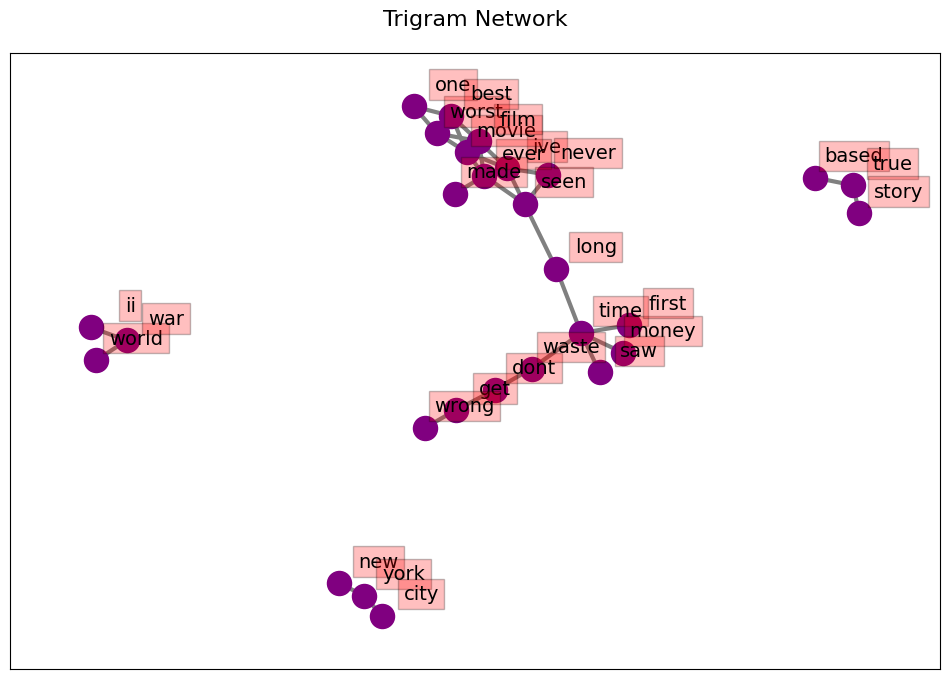

In [ ]:
trigrams_list = []
for comment_tokens in comment_list:
    trigrams_list.extend(list(trigrams(comment_tokens)))

trigrams_freq = Counter(trigrams_list)
trigrams_freq.most_common(25)

G = nx.Graph()
for b, freq in trigrams_freq.most_common(25):
    G.add_edge(b[0], b[1], weight=freq)
    G.add_edge(b[1], b[2], weight=freq)

plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color="grey",
                 node_color="purple",
                 with_labels=False)

# create offset labels
for key, value in pos.items():
    x, y = value[0] + 0.1, value[1] + 0.05
    plt.text(x, y, s=key,
             bbox=dict(facecolor="red", alpha=0.25),
             horizontalalignment="center", fontsize=14)

plt.title("Trigram Network", fontsize=16, pad=20)
plt.show()

#LDA

0 ['german', 'prot', 'victor', 'world', 'man', 'would', 'film', 'new', 'gram', 'team']
1 ['film', 'time', 'one', 'story', 'scene', 'life', 'great', 'take', 'well', 'play']
2 ['movie', 'one', 'scene', 'like', 'love', 'story', 'end', 'get', 'make', 'show']
3 ['movie', 'even', 'film', 'story', 'great', 'well', 'good', 'character', 'one', 'find']
4 ['film', 'movie', 'one', 'story', 'character', 'like', 'time', 'life', 'would', 'even']
5 ['movie', 'film', 'one', 'like', 'good', 'really', 'bad', 'time', 'get', 'see']
6 ['film', 'war', 'man', 'good', 'one', 'version', 'character', 'cast', 'would', 'performance']
7 ['film', 'like', 'get', 'time', 'bad', 'one', 'movie', 'good', 'match', 'monster']
8 ['film', 'one', 'scene', 'story', 'good', 'character', 'well', 'time', 'also', 'like']
9 ['film', 'series', 'performance', 'one', 'great', 'well', 'best', 'time', 'story', 'also']
                                              review sentiment  \
0  I saw this movie on TV when it came out, and n...  

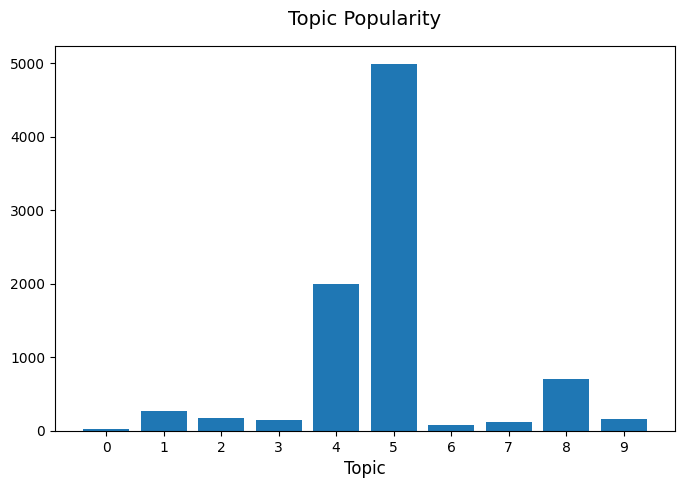

In [ ]:
# Carica il file CSV
df = pd.read_csv('/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv', delimiter = ',')
comments_for_lda = df['clean_review'].tolist()

# Vectorization
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(comments_for_lda)
tf_feature_names = tf_vectorizer.get_feature_names_out()

# LDA model
k = 10
lda_topic_model = LatentDirichletAllocation(n_components=k, random_state=0).fit(tf)
doc_topics = lda_topic_model.transform(tf)

# Displaying top words in each topic
no_top_words = 10
for i, topic in enumerate(lda_topic_model.components_):
    print(i, [tf_feature_names[index] for index in topic.argsort()[:-no_top_words - 1:-1]])

# Assigning a topic to each document
doc_topic_index = [doc_topics[i].argmax() for i in range(doc_topics.shape[0])]

# Adding the topic as a new column in the dataframe
df["topic"] = doc_topic_index

# Displaying the first few rows with the new topic column
print(df.head())

# Topic popularity
topic_counts = df["topic"].value_counts().sort_index()

# Plotting topic popularity
plt.figure(figsize=(8, 5))
plt.bar(topic_counts.index, topic_counts)
plt.title("Topic Popularity", fontsize=14, pad=15)
plt.xlabel("Topic", fontsize = 12)
plt.xticks(range(k))
plt.show()


In [ ]:
df.head(10)

,review,sentiment,processed_reviews,clean_review,topic
0,For a movie that gets no respect there sure ar...,positive,movi get respect sure lot memor quot list thi ...,movie get respect sure lot memorable quote lis...,5
1,Bizarre horror movie filled with famous faces ...,positive,bizarr horror movi fill famou face stolen cris...,bizarre horror movie filled famous face stolen...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",positive,solid unremark film matthau einstein wa wonder...,solid unremarkable film matthau einstein wonde...,9
3,It's a strange feeling to sit alone in a theat...,positive,strang feel sit alon theater occupi parent rol...,strange feeling sit alone theater occupied par...,4
4,"You probably all already know this by now, but...",positive,probabl alreadi know thi 5 addit episod never ...,probably already know additional episode never...,6
5,I saw the movie with two grown children. Altho...,positive,saw movi two grown child although wa clever sh...,saw movie two grown child although clever shre...,9
6,You're using the IMDb.<br /><br />You've given...,positive,use imdbyouv given hefti vote favourit filmsit...,youre using imdbyouve given hefty vote favouri...,0
7,This was a good film with a powerful message o...,positive,thi wa good film power messag love redempt lov...,good film powerful message love redemption lov...,9
8,"Made after QUARTET was, TRIO continued the qua...",positive,made quartet wa trio continu qualiti earlier f...,made quartet trio continued quality earlier fi...,0
9,"For a mature man, to admit that he shed a tear...",positive,matur man admit shed tear thi film matur respo...,mature man admit shed tear film mature respons...,9


#SENTIMENT_CLASSIFICATION

#Train and test set

In [ ]:
#Dataset
cols = ['Sentiment', 'Review']
new_IMDB_df = pd.read_csv('/content/drive/MyDrive/Text Mining/processed_IMDB_REVIEWS_ALL2.csv', delimiter=',')
final_IMDB_df = pd.DataFrame(columns=cols, index=range(len(new_IMDB_df.index)))
final_IMDB_df["Sentiment"] = ""

for i in range(0,len(new_IMDB_df.index)):
    if new_IMDB_df['sentiment'].iloc[i] == 'positive':
        final_IMDB_df["Sentiment"].iloc[i] = 1
    else:
        final_IMDB_df["Sentiment"].iloc[i] = 0

new_IMDB_df["Sentiment"] = final_IMDB_df["Sentiment"].astype("float32")
new_IMDB_df["Review"] = new_IMDB_df['clean_review']

# Convert 'Sentiment' to float32
new_IMDB_df['Sentiment'] = new_IMDB_df['Sentiment'].astype("float32")

# Split the dataset into training and validation sets
train_df, temp_df = train_test_split(new_IMDB_df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)



#Bag of words

1.Single words (Unigrams) with binary encoding (multi-hot)

In [ ]:
# Create a TextVectorization layer
max_tokens = 20000
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode="multi_hot",
)

# Fit the TextVectorization layer to the training data
text_vectorization.adapt(train_df['Review'].values.astype('str'))

# Vectorize the data for training, validation, and test sets
def vectorize_data(x, y):
    return text_vectorization(x), y

train_ds = vectorize_data(train_df['Review'].values.astype('str'), train_df['Sentiment'].values)
val_ds = vectorize_data(val_df['Review'].values.astype('str'), val_df['Sentiment'].values)
test_ds = vectorize_data(test_df['Review'].values.astype('str'), test_df['Sentiment'].values)

In [ ]:
# Define the model
def get_model(max_tokens=max_tokens, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Create and compile the model
model = get_model()
model.summary()

checkpoint_path = '/content/drive/MyDrive/Text Mining/binary_1gram.h5'

# Train the model and save the checkpoint
callbacks = [
    keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)
]

model.fit(
    train_ds[0],
    train_ds[1],
    validation_data=(val_ds[0], val_ds[1]),
    epochs=10,
    callbacks=callbacks
)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_8 (Dense)             (None, 16)                320016    
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
163/163 [==============================] - 3s 15ms/step - loss: 0.5412 - accuracy: 0.7550 - val_loss: 0.4042 - val_accuracy: 0.8627
Epoch 2/10
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 4s 23ms/step - loss: 0.3364 - accuracy: 0.8804 - val_loss: 0.3272 - val_accuracy: 0.8795
Epoch 3/10
163/163 [==============================] - 2s 12ms/step - loss: 0.2396 - accuracy: 0.9183 - val_loss: 0.2933 - val_accuracy: 0.8910
Epoch 4/10
163/163 [==============================] - 2s 11ms/step - loss: 0.1912 - accuracy: 0.9360 - val_loss: 0.2902 - val_accuracy: 0.8968
Epoch 5/10
163/163 [==============================] - 2s 12ms/step - loss: 0.1565 - accuracy: 0.9489 - val_loss: 0.2976 - val_accuracy: 0.8875
Epoch 6/10
163/163 [==============================] - 2s 10ms/step - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.3155 - val_accuracy: 0.8904
Epoch 7/10
163/163 [==============================] - 1s 9ms/step - loss: 0.1102 - accuracy: 0.9650 - val_loss: 0.3207 - val_accuracy: 0.8893
Epoch 8/10
163/163 [==============================] - 1s 9ms/step - loss: 0.0952 - accuracy: 0.9717 - val_loss: 0.3409 - val_accuracy: 0.8875
Epoch 9/10
1

Test the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Text Mining/binary_1gram.h5')
test_loss, test_accuracy = model.evaluate(test_ds[0], test_ds[1])

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

55/55 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8812
Test Accuracy: 88.12%


In [ ]:
y_pred = model.predict(test_ds[0])
y_pred_binary = (y_pred > 0.5).astype("int32")

precision, recall, f1_score, _ = precision_recall_fscore_support(test_ds[1], y_pred_binary, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

55/55 [==============================] - 0s 4ms/step
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


Confusion Matrix:
[[897 103]
 [103 631]]


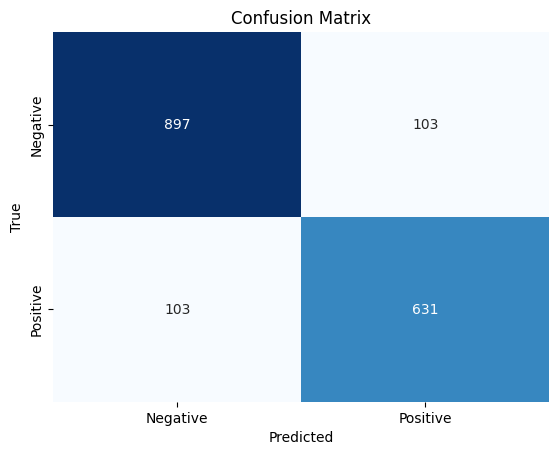

In [ ]:
conf_matrix = confusion_matrix(test_ds[1], y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2.Two words (Bigrams) with binary encoding (multi-hot)

In [ ]:
# Create a TextVectorization layer for bigrams
text_vectorization_bigram = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

# Fit the TextVectorization layer to the training data
text_vectorization_bigram.adapt(train_df['Review'].values.astype('str'))

# Vectorize the data for training, validation, and test sets with bigrams
def vectorize_data_bigram(x, y):
    return text_vectorization_bigram(x), y

train_ds_bigram = vectorize_data_bigram(train_df['Review'].values.astype('str'), train_df['Sentiment'].values)
val_ds_bigram = vectorize_data_bigram(val_df['Review'].values.astype('str'), val_df['Sentiment'].values)
test_ds_bigram = vectorize_data_bigram(test_df['Review'].values.astype('str'), test_df['Sentiment'].values)

In [ ]:
# Define the model
def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Create and compile the model
model = get_model()
model.summary()

# Train the model with bigram data and save the checkpoint
checkpoint_path_bigram = '/content/drive/MyDrive/Text Mining/binary_2gram.h5'

callbacks_bigram = [
    keras.callbacks.ModelCheckpoint(checkpoint_path_bigram, save_best_only=True)
]

model.fit(
    train_ds_bigram[0],
    train_ds_bigram[1],
    validation_data=(val_ds_bigram[0], val_ds_bigram[1]),
    epochs=10,
    callbacks=callbacks_bigram
)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 20000)]           0         
                                                                 
 dense_18 (Dense)            (None, 16)                320016    
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
163/163 [==============================] - 2s 11ms/step - loss: 0.5206 - accuracy: 0.7606 - val_loss: 0.3705 - val_accuracy: 0.8737
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 1s 9ms/step - loss: 0.3050 - accuracy: 0.8881 - val_loss: 0.3044 - val_accuracy: 0.8824
Epoch 3/10
163/163 [==============================] - 2s 10ms/step - loss: 0.2098 - accuracy: 0.9296 - val_loss: 0.2882 - val_accuracy: 0.8904
Epoch 4/10
163/163 [==============================] - 1s 9ms/step - loss: 0.1542 - accuracy: 0.9542 - val_loss: 0.2874 - val_accuracy: 0.8950
Epoch 5/10
163/163 [==============================] - 2s 12ms/step - loss: 0.1202 - accuracy: 0.9650 - val_loss: 0.2972 - val_accuracy: 0.8979
Epoch 6/10
163/163 [==============================] - 2s 12ms/step - loss: 0.0940 - accuracy: 0.9725 - val_loss: 0.3136 - val_accuracy: 0.8939
Epoch 7/10
163/163 [==============================] - 2s 12ms/step - loss: 0.0829 - accuracy: 0.9771 - val_loss: 0.3307 - val_accuracy: 0.8899
Epoch 8/10
163/163 [==============================] - 2s 11ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.3454 - val_accuracy: 0.8922
Epoch 9/10
1

Test the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Text Mining/binary_2gram.h5')
test_loss, test_accuracy = model.evaluate(test_ds_bigram[0], test_ds_bigram[1])

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

55/55 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8829
Test Accuracy: 88.29%


In [ ]:
y_pred = model.predict(test_ds_bigram[0])
y_pred_binary = (y_pred > 0.5).astype("int32")

precision, recall, f1_score, _ = precision_recall_fscore_support(test_ds_bigram[1], y_pred_binary, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

55/55 [==============================] - 2s 5ms/step
Precision: 0.86
Recall: 0.87
F1-Score: 0.86


Confusion Matrix:
[[893 107]
 [ 96 638]]


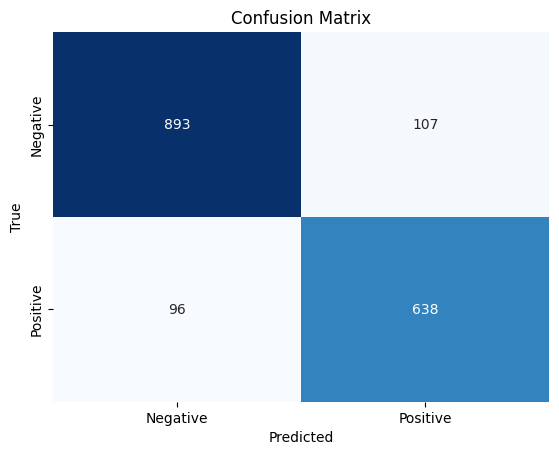

In [ ]:
conf_matrix = confusion_matrix(test_ds_bigram[1], y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3.Two words (Bigrams) with TF-IDF encoding

In [ ]:
# Create a TextVectorization layer for bigrams with TF-IDF output mode
text_vectorization_tfidf_bigram = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf-idf",
)

# Fit the TextVectorization layer to the training data
text_vectorization_tfidf_bigram.adapt(train_df['Review'].values.astype('str'))

# Vectorize the data for training, validation, and test sets with TF-IDF bigrams
def vectorize_data_tfidf_bigram(x, y):
    return text_vectorization_tfidf_bigram(x), y

tfidf_2gram_train_ds = vectorize_data_tfidf_bigram(train_df['Review'].values.astype('str'), train_df['Sentiment'].values)
tfidf_2gram_val_ds = vectorize_data_tfidf_bigram(val_df['Review'].values.astype('str'), val_df['Sentiment'].values)
tfidf_2gram_test_ds = vectorize_data_tfidf_bigram(test_df['Review'].values.astype('str'), test_df['Sentiment'].values)

In [ ]:
# Define the model
def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Create and compile the model
model = get_model()
model.summary()

# Train the model with TF-IDF bigram data and save the checkpoint
checkpoint_path_tfidf_bigram = '/content/drive/MyDrive/Text Mining/tfidf_2gram.h5'

callbacks_tfidf_bigram = [
    keras.callbacks.ModelCheckpoint(checkpoint_path_tfidf_bigram, save_best_only=True)
]

model.fit(
    tfidf_2gram_train_ds[0],
    tfidf_2gram_train_ds[1],
    validation_data=(tfidf_2gram_val_ds[0], tfidf_2gram_val_ds[1]),
    epochs=10,
    callbacks=callbacks_tfidf_bigram
)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 20000)]           0         
                                                                 
 dense_20 (Dense)            (None, 16)                320016    
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
163/163 [==============================] - 3s 12ms/step - loss: 0.7036 - accuracy: 0.6916 - val_loss: 0.4641 - val_accuracy: 0.8062
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 2s 10ms/step - loss: 0.3713 - accuracy: 0.8454 - val_loss: 0.3730 - val_accuracy: 0.8443
Epoch 3/10
163/163 [==============================] - 2s 10ms/step - loss: 0.2498 - accuracy: 0.9000 - val_loss: 0.2984 - val_accuracy: 0.8904
Epoch 4/10
163/163 [==============================] - 2s 10ms/step - loss: 0.1775 - accuracy: 0.9333 - val_loss: 0.2925 - val_accuracy: 0.8956
Epoch 5/10
163/163 [==============================] - 1s 9ms/step - loss: 0.1377 - accuracy: 0.9492 - val_loss: 0.3338 - val_accuracy: 0.8881
Epoch 6/10
163/163 [==============================] - 1s 9ms/step - loss: 0.1058 - accuracy: 0.9585 - val_loss: 0.4554 - val_accuracy: 0.8685
Epoch 7/10
163/163 [==============================] - 2s 10ms/step - loss: 0.1046 - accuracy: 0.9635 - val_loss: 0.4307 - val_accuracy: 0.8674
Epoch 8/10
163/163 [==============================] - 2s 13ms/step - loss: 0.0849 - accuracy: 0.9687 - val_loss: 0.3888 - val_accuracy: 0.8870
Epoch 9/10
1

Test the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Text Mining/tfidf_2gram.h5')
test_loss, test_accuracy = model.evaluate(tfidf_2gram_test_ds[0], tfidf_2gram_test_ds[1])

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

55/55 [==============================] - 0s 4ms/step - loss: 0.3050 - accuracy: 0.8904
Test Accuracy: 89.04%


In [ ]:
y_pred = model.predict(tfidf_2gram_test_ds[0])
y_pred_binary = (y_pred > 0.5).astype("int32")

precision, recall, f1_score, _ = precision_recall_fscore_support(tfidf_2gram_test_ds[1], y_pred_binary, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

55/55 [==============================] - 0s 4ms/step
Precision: 0.85
Recall: 0.90
F1-Score: 0.87


Confusion Matrix:
[[887 113]
 [ 77 657]]


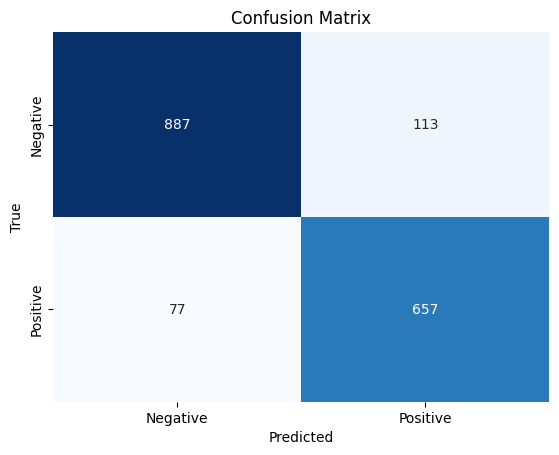

In [ ]:
conf_matrix = confusion_matrix(tfidf_2gram_test_ds[1], y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Sequence model approach

In [ ]:
max_length = 600
max_tokens = 20000

# Create a TextVectorization layer for integer sequences
text_vectorization_int = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)

# Fit the TextVectorization layer to the training data
text_vectorization_int.adapt(train_df['Review'].values.astype('str'))

# Vectorize the data for training, validation, and test sets with integer sequences
def vectorize_data_int(x, y):
    return text_vectorization_int(x), y

int_train_ds = vectorize_data_int(train_df['Review'].values.astype('str'), train_df['Sentiment'].values)
int_val_ds = vectorize_data_int(val_df['Review'].values.astype('str'), val_df['Sentiment'].values)
int_test_ds = vectorize_data_int(test_df['Review'].values.astype('str'), test_df['Sentiment'].values)

1.Word embedding wihtout masking

In [ ]:
embedding_dim = 256

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=embedding_dim, mask_zero=False)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Text Mining/embeddings_without_masking_bis.h5", save_best_only=True)]

model.fit(
    int_train_ds[0],
    int_train_ds[1],
    validation_data=(int_val_ds[0], int_val_ds[1]),
    epochs=10,
    callbacks=callbacks
)


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5194049 (19.81 MB)
Trainable params: 5194049 (19.81 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 176s 999ms/step - loss: 0.5963 - accuracy: 0.6733 - val_loss: 0.4481 - val_accuracy: 0.8085
Epoch 2/10
163/163 [==============================] - 144s 886ms/step - loss: 0.3489 - accuracy: 0.8639 - val_loss: 0.3925 - val_accuracy: 0.8333
Epoch 3/10
163/163 [==============================] - 155s 950ms/step - loss: 0.1998 - accuracy: 0.9348 - val_loss: 0.4344 - val_accuracy: 0.8437
Epoch 4/10
163/163 [==============================] - 142s 870ms/step - loss: 0.1243 - accuracy: 0.9644 - val_loss: 0.4045 - val_accuracy: 0.8501
Epoch 5/10
163/163 [==============================] - 141s 864ms/step - loss: 0.0788 - accuracy: 0.9758 - val_loss: 0.6257 - val_accuracy: 0.8281
Epoch 6/10
163/163 [==============================] - 140s 860ms/step - loss: 0.0456 - accuracy: 0.9887 - val_loss: 0.5704 - val_accuracy: 0.8518
Epoch 7/10
163/163 [==============================] - 140s 859ms/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.6840 - val_accura

Test the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Text Mining/embeddings_without_masking_bis.h5')
test_loss, test_accuracy = model.evaluate(int_test_ds[0], int_test_ds[1])

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

55/55 [==============================] - 11s 170ms/step - loss: 0.3671 - accuracy: 0.8512
Test Accuracy: 85.12%


In [ ]:
y_pred = model.predict(int_test_ds[0])
y_pred_binary = (y_pred > 0.5).astype("int32")

precision, recall, f1_score, _ = precision_recall_fscore_support(int_test_ds[1], y_pred_binary, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

55/55 [==============================] - 9s 146ms/step
Precision: 0.78
Recall: 0.90
F1-Score: 0.84


Confusion Matrix:
[[818 182]
 [ 76 658]]


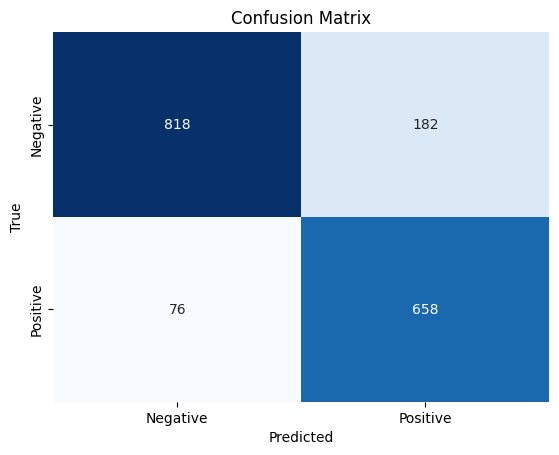

In [ ]:
conf_matrix = confusion_matrix(int_test_ds[1], y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2.2.Word embedding with masking

In [ ]:
embedding_dim = 256

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=embedding_dim, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Text Mining/embeddings_with_masking.h5", save_best_only=True)]

model.fit(
    int_train_ds[0],
    int_train_ds[1],
    validation_data=(int_val_ds[0], int_val_ds[1]),
    epochs=10,
    callbacks=callbacks
)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 256)         5120000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                73984     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5194049 (19.81 MB)
Trainable params: 5194049 (19.81 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 337s 2s/step - loss: 0.5234 - accuracy: 0.7249 - val_loss: 0.3700 - val_accuracy: 0.8443
Epoch 2/10
163/163 [==============================] - 245s 2s/step - loss: 0.2569 - accuracy: 0.8994 - val_loss: 0.3357 - val_accuracy: 0.8604
Epoch 3/10
163/163 [==============================] - 194s 1s/step - loss: 0.1424 - accuracy: 0.9504 - val_loss: 0.3513 - val_accuracy: 0.8777
Epoch 4/10
163/163 [==============================] - 193s 1s/step - loss: 0.0797 - accuracy: 0.9748 - val_loss: 0.3931 - val_accuracy: 0.8610
Epoch 5/10
163/163 [==============================] - 193s 1s/step - loss: 0.0445 - accuracy: 0.9887 - val_loss: 0.4904 - val_accuracy: 0.8460
Epoch 6/10
163/163 [==============================] - 183s 1s/step - loss: 0.0266 - accuracy: 0.9925 - val_loss: 0.5332 - val_accuracy: 0.8702
Epoch 7/10
163/163 [==============================] - 193s 1s/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7662 - val_accuracy: 0.8616
Epoch 8/10

Test the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Text Mining/embeddings_with_masking.h5')
test_loss, test_accuracy = model.evaluate(int_test_ds[0], int_test_ds[1])

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

55/55 [==============================] - 15s 220ms/step - loss: 0.3465 - accuracy: 0.8541
Test Accuracy: 85.41%


In [ ]:
y_pred = model.predict(int_test_ds[0])
y_pred_binary = (y_pred > 0.5).astype("int32")

precision, recall, f1_score, _ = precision_recall_fscore_support(int_test_ds[1], y_pred_binary, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

55/55 [==============================] - 14s 202ms/step
Precision: 0.91
Recall: 0.73
F1-Score: 0.81


Confusion Matrix:
[[945  55]
 [198 536]]


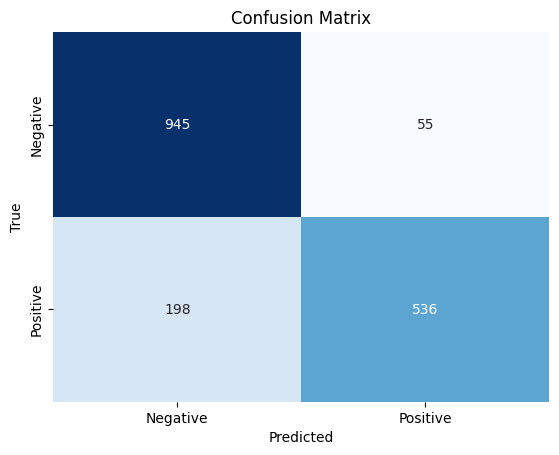

In [ ]:
conf_matrix = confusion_matrix(int_test_ds[1], y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()